<a href="https://colab.research.google.com/github/CiaranMaloy/audioautoencoder/blob/dataset-generation-fix/Test_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Test Dataset

In [1]:
import sys
import os

# Detect Google Colab
if "google.colab" in sys.modules:
  from google.colab import drive
  drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Detect Google Colab
if "google.colab" in sys.modules:
    print("Running in Google Colab...")
    os.system("git clone https://github.com/CiaranMaloy/audioautoencoder")
    os.chdir("/content/audioautoencoder/")
    os.system("git pull")
    os.system("git checkout dataset-generation-fix")
    os.system("git pull origin dataset-generation-fix")
    #os.system("pip install --upgrade torchmetrics")
else:
    print("Running locally...")
    os.system("git pull origin dataset-generation-fix")
    #os.system("pip install --upgrade torchmetrics")


Running in Google Colab...


In [3]:
import sys
sys.path.append('/content/audioautoencoder')
sys.path.append('/content/audioautoencoder/audioautoencoder')

Notes on testing:
1. SDR is missing as a metric

## Load Model

In [4]:
from audioautoencoder.models.UNetConv4 import *
from audioautoencoder.training import DenoisingLoader

In [5]:
import torch

In [6]:
IMPORT_TEST_NOISY = True
max_file_size_gb = 6

In [7]:
from audioautoencoder.datasets.utils import *
from audioautoencoder.data import *
from audioautoencoder.data_management import *
from audioautoencoder.generate_dataset import *

In [8]:
model_name = 'Testing'
SNRdB_load = [-10, 10]
SNRdB = [-10, 10] # SNR random range
#load_file = 'Autoencodermodel_earlystopping.pth'
load_file = 'Autoencodermodel_checkpoint.pth'

folder = 'remapped-signal-level'

output_path = f'/content/drive/MyDrive/Projects/ML_Projects/De-noising-autoencoder/Models_Comparison/Checkpoints_{model_name}_{SNRdB_load[0]}-{SNRdB_load[1]}/'
scaler_file = output_path + "scalers.pkl"  # Static filename since it's unique per run
os.makedirs(os.path.dirname(scaler_file), exist_ok=True)
source_folder = f"/content/drive/MyDrive/Datasets/Music-Noise/SNRdB_{folder}/SNRdB_{SNRdB[0]}-{SNRdB[1]}/"
source_path = source_folder + "train/"

In [9]:
destination_path = f"/content/SNRdB_{SNRdB[0]}-{SNRdB[1]}/test/"

from google.colab import drive

if IMPORT_TEST_NOISY:
  if not os.path.exists(destination_path):
    combine_h5_files_spectrograms(source_path, destination_path, max_file_size_gb=max_file_size_gb)

Created new file: /content/SNRdB_-10-10/test/combined_000.h5


Processing:   0%|          | 0/204 [00:00<?, ?it/s]


Attempt 1 failed: Timeout after 20 seconds. Retrying in 3 seconds.


Processing:   0%|          | 1/204 [00:42<2:23:38, 42.46s/it, samples=500, size=0.668 GB]


Attempt 1 failed: Timeout after 20 seconds. Retrying in 3 seconds.


Processing:   1%|          | 2/204 [01:33<2:40:37, 47.71s/it, samples=1000, size=1.336 GB]


Attempt 1 failed: Timeout after 20 seconds. Retrying in 3 seconds.


Processing:   1%|▏         | 3/204 [03:03<3:44:28, 67.01s/it, samples=1499, size=2.003 GB]


Attempt 1 failed: Timeout after 20 seconds. Retrying in 3 seconds.


Processing:   2%|▏         | 4/204 [03:40<3:03:08, 54.94s/it, samples=1999, size=2.672 GB]


Attempt 1 failed: Timeout after 20 seconds. Retrying in 3 seconds.


Processing:   2%|▏         | 5/204 [04:24<2:49:12, 51.02s/it, samples=2499, size=3.34 GB]


Attempt 1 failed: Timeout after 20 seconds. Retrying in 3 seconds.


Processing:   3%|▎         | 6/204 [05:09<2:41:42, 49.00s/it, samples=2998, size=4.007 GB]


Attempt 1 failed: Timeout after 20 seconds. Retrying in 3 seconds.


Processing:   3%|▎         | 7/204 [05:54<2:36:54, 47.79s/it, samples=3497, size=4.674 GB]


Attempt 1 failed: Timeout after 20 seconds. Retrying in 3 seconds.


Processing:   4%|▍         | 8/204 [06:46<2:40:23, 49.10s/it, samples=3997, size=5.342 GB]


Attempt 1 failed: Timeout after 20 seconds. Retrying in 3 seconds.


Processing:   4%|▍         | 8/204 [07:41<3:08:18, 57.64s/it, samples=4381, size=5.855 GB]


Finished combining files into 1 output files in /content/SNRdB_-10-10/test/


In [10]:
from audioautoencoder.datasets.utils import *

In [11]:
dataset_path = f"/content/SNRdB_{SNRdB[0]}-{SNRdB[1]}/test/combined_000.h5"

In [12]:
if os.path.exists(scaler_file):
    print("Loading existing scalers...")
    scalers = load_scalers(scaler_file)
else:
    print("Training new scalers...")
    scalers = train_scalers_no_features(dataset_path, sample_size=8000)
    save_scalers(scalers, scaler_file)

Training new scalers...
Training scalers for separation dataset
Training Spectrogram...
Input features
Target features


In [13]:
if IMPORT_TEST_NOISY:
    print("Loading existing scalers...")
    scalers = load_scalers(scaler_file)
    test_loader = ChannelDatasetLoader(
          dataset_path=dataset_path,
          scalers=scalers,
          output_time_length=175,
          channels=1,
          snr_db=SNRdB,
          subset=False,
          batch_size=4
      )

    print(f"Training set size: {len(test_loader.train_dataset)}")
    print(f"Validation set size: {len(test_loader.val_dataset)}")

Loading existing scalers...
Training set size: 3504
Validation set size: 877
Training set size: 3504
Validation set size: 877


In [14]:
import os
os.system("pip install --upgrade torchmetrics")

0

In [15]:
from audioautoencoder.testing import *

In [114]:
_, output, medatata = test_loader.train_dataset[200]
#input, output = train_dataset[0]
#print(metadata['snr_db'])
#print(input.shape)
print(output.shape)

torch.Size([4, 256, 175])


3.122671604156494
(4, 256, 175)
(256, 175)
Min, Max:  0.0 2.1961281
(256, 175)
Min, Max:  0.0 1.8199023
(256, 175)
Min, Max:  0.0 1.7565925
(256, 175)
Min, Max:  0.0 1.3722908
Min, Max:  0.0 1.7479198
Min, Max:  0.0 1.8179647
Min, Max:  0.0 1.7520348
Min, Max:  0.0 1.378122


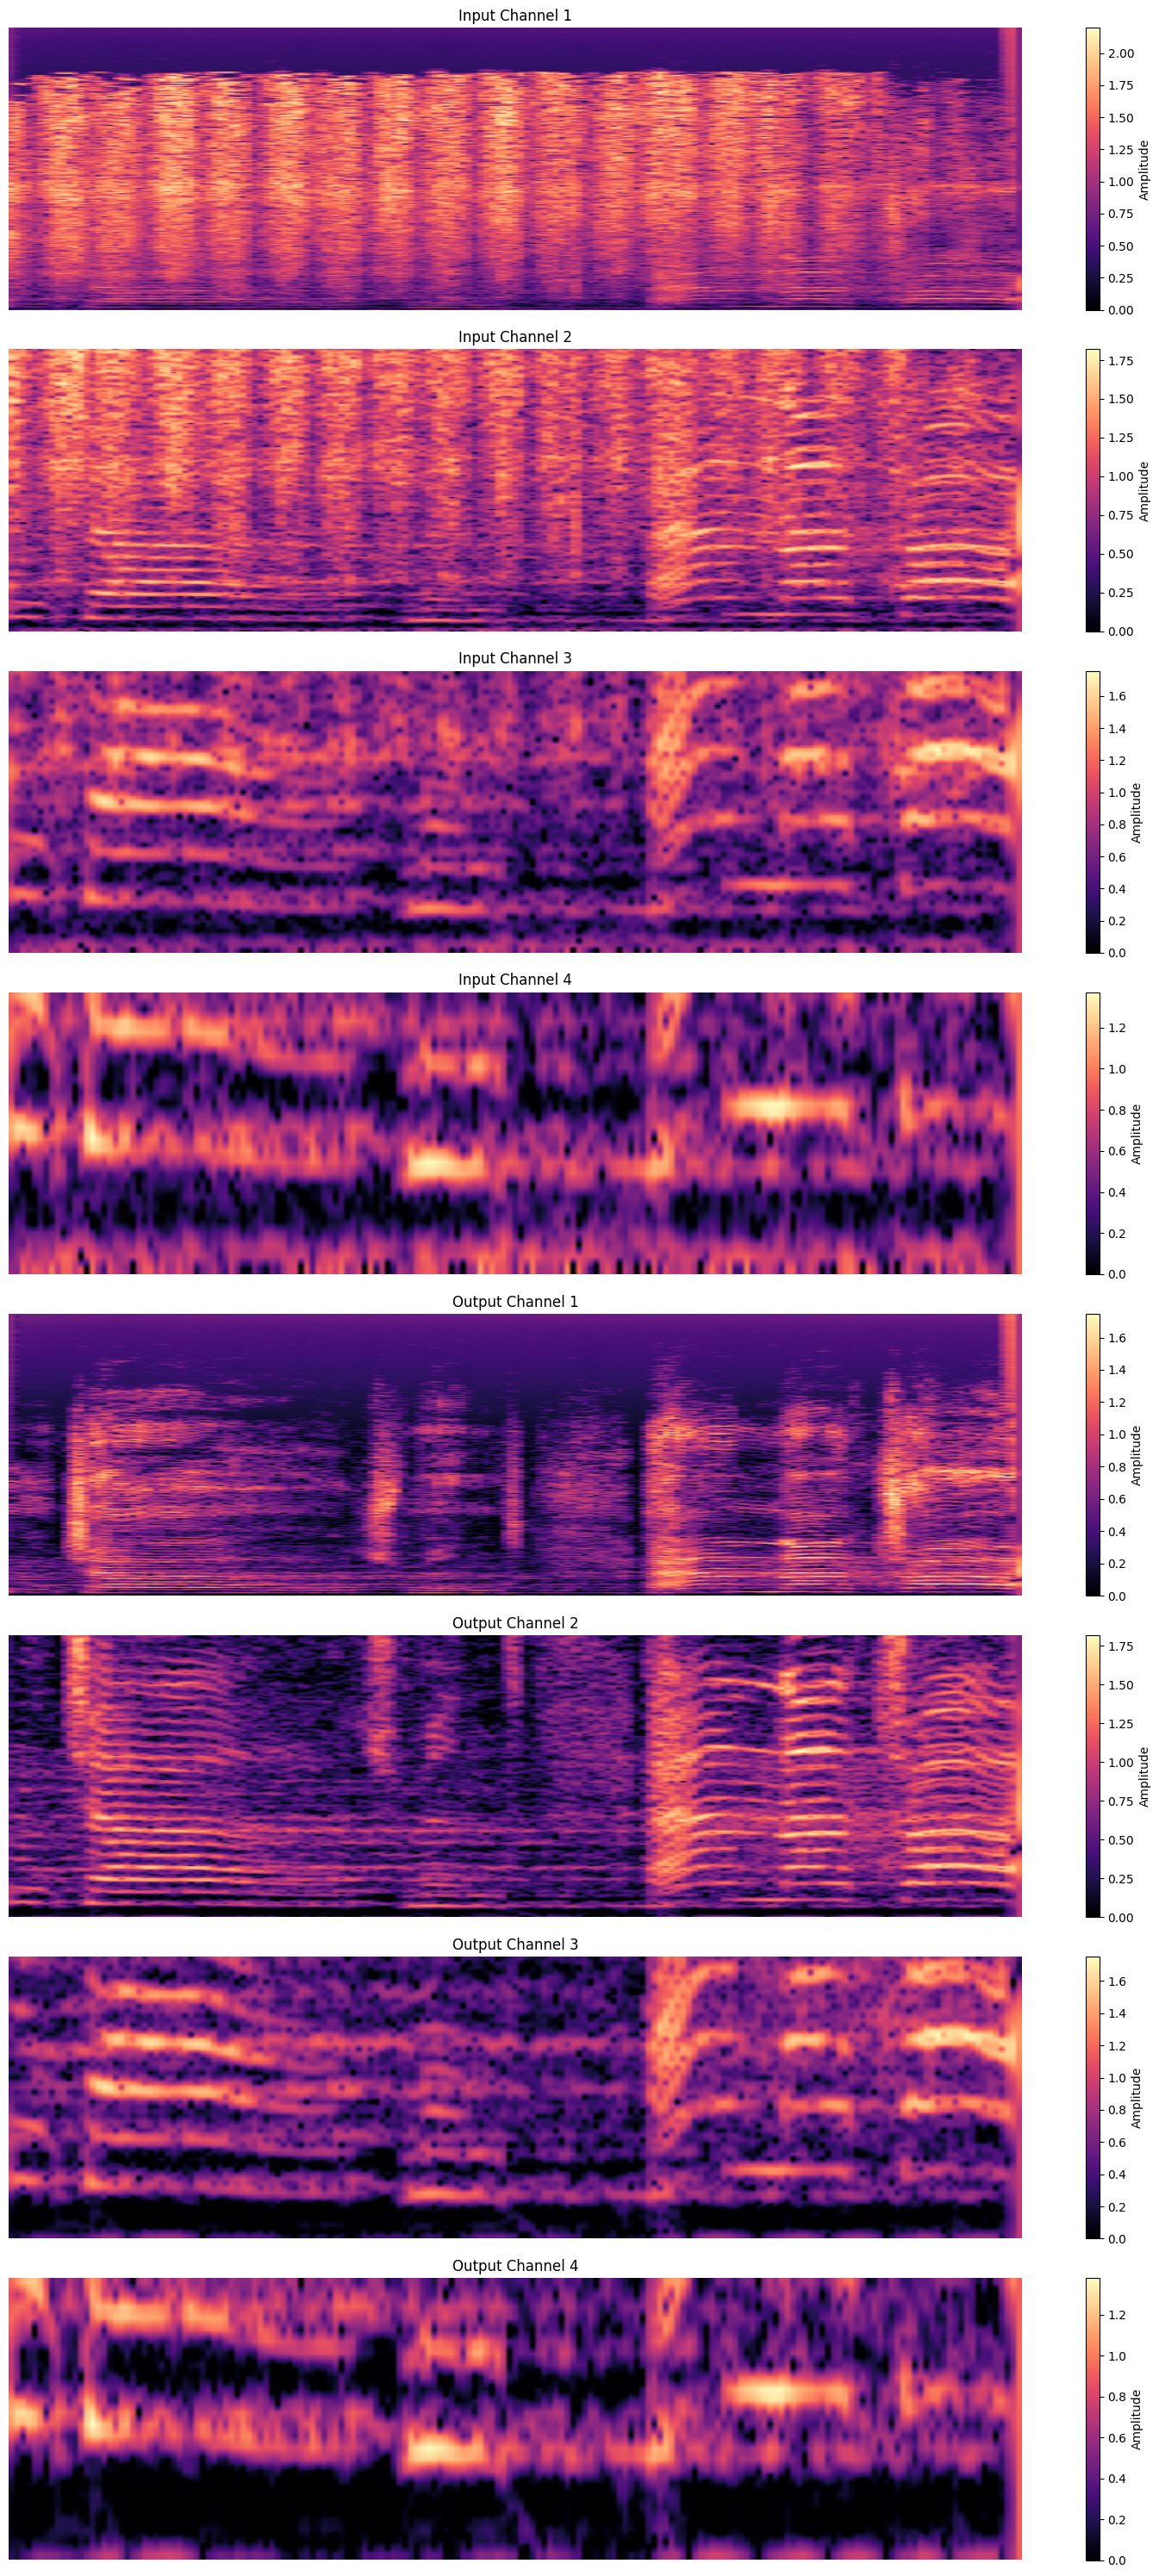

In [117]:
import matplotlib.pyplot as plt
import torch
import numpy as np
import torch

# Fetch a sample
input_tensor, output_tensor, metadata = test_loader.train_dataset[20]

print(metadata['snr_db'])

# Convert to NumPy for plotting
#input_array = np.clip(input_tensor.numpy(), -1, a_max=None)
output_array = np.clip(output_tensor.numpy(), -1, a_max=None)
input_array = np.clip(input_tensor.numpy(), -1, a_max=None)

# remove negatve values
#input_array = torch.clamp(input_array, min=0)  # Sets all negative values to 0
print(np.shape(output_array))

num_channels_out = output_array.shape[0]
num_channels_in = input_array.shape[0]


# Create subplots
fig, axes = plt.subplots(num_channels_in + num_channels_out, 1, figsize=(15, 30))

# Plot each input channel
for i in range(num_channels_in):
    input = input_array[i]
    print(np.shape(input))
    print('Min, Max: ', np.min(input), np.max(input))
    im = axes[i].imshow(input, aspect='auto', cmap='magma')
    axes[i].invert_yaxis()

    axes[i].set_title(f"Input Channel {i+1}")
    axes[i].axis("off")

    # Add colorbar
    cbar = fig.colorbar(im, ax=axes[i], orientation="vertical")
    cbar.set_label("Amplitude")

  # Plot each input channel
for i in range(num_channels_out):
    output = output_array[i]
    print('Min, Max: ', np.min(output), np.max(output))
    im = axes[num_channels_in + i].imshow(output, aspect='auto', cmap='magma')
    axes[num_channels_in + i].invert_yaxis()

    axes[num_channels_in + i].set_title(f"Output Channel {i+1}")
    axes[num_channels_in + i].axis("off")

    # Add colorbar
    cbar = fig.colorbar(im, ax=axes[num_channels_in + i], orientation="vertical")
    cbar.set_label("Amplitude")

plt.tight_layout()
plt.show()


## Test Dataset

In [16]:
df_eval = test_dataset(test_loader.train_loader, scalers)

Testing: 100%|██████████| 876/876 [04:32<00:00,  3.22batch/s]


In [83]:
df = df_eval.copy()

In [84]:
import pandas as pd
# 1. Split filenames (assuming they are bytes)
df["music_filename"] = df["filename"].apply(lambda x: x[0].decode('utf-8') if isinstance(x[0], bytes) else x[0])
df["noise_filename"] = df["filename"].apply(lambda x: x[1].decode('utf-8') if isinstance(x[1], bytes) else x[1])
df.drop(columns=["filename"], inplace=True)

# 2. Flatten metadata dictionary
metadata_expanded = df["metadata"].apply(pd.Series)
df = pd.concat([df.drop(columns=["metadata"]), metadata_expanded], axis=1)

# remove filepaths
df["music_filename"] = df["music_filename"].str.split("/").str[-1]
df["noise_filename"] = df["noise_filename"].str.split("/").str[-1]


In [85]:
print(df["noise_filename"])

0                         Vinyl_Crackle_pWrdy9_sec130.wav
1            Fireworks - New Year's Eve_0JNns7_sec236.wav
2                       Robocup 2019 4.5_ichKFO_sec26.wav
3                           3-139109-A-46_IJ0PHx_sec2.wav
4                        crowd noise (3)_wrxBIZ_sec72.wav
                              ...                        
3499                            07076025_M6cSQo_sec38.wav
3500                            neut0001_tgEQmE_sec22.wav
3501                        4-165813-B-19_OhvoN4_sec4.wav
3502    airplane-effect-with-passengers-sound_2RUVt3_s...
3503                  Water-stream-noise_yCZQDA_sec78.wav
Name: noise_filename, Length: 3504, dtype: object


In [93]:
def get_class_from_filename(filename, classes):
    for keyword in classes:
        if keyword in filename:
            return keyword
    return 'Unknown'  # Default if no match found

classes = ['mixture', 'vocals', 'drums', 'guitar', 'bass', 'piano', 'electric_guitar', 'acoustic_guitar', 'synthesizer', 'strings', 'brass']
df['audio_class'] = df['music_filename'].apply(lambda x: get_class_from_filename(x, classes))

classes = ['0707', 'Rain', 'Crowd', 'Water', 'Ice', 'Sea', 'Plane', 'Vinyl', 'crowd', 'Robocup', 'Birds']
df['noise_class'] = df['noise_filename'].apply(lambda x: get_class_from_filename(x, classes))

In [94]:
ESC_50 = r'/content/drive/MyDrive/Datasets/Noise/archive.zip (Unzipped Files)/esc50.csv'
esc50_df = pd.read_csv(ESC_50)

# Strip '.wav' from filenames
esc50_df["filename_stripped"] = esc50_df["filename"].str.replace(".wav", "", regex=False)

# Build mapping from stripped filename to category
filename_to_category = dict(zip(esc50_df["filename_stripped"], esc50_df["category"]))

print(filename_to_category)

# Function to search for filename within the full noise_filename path
def find_category_from_filename(noise_path):
    for short_name, category in filename_to_category.items():
        if short_name in noise_path:
            return category
    return 'Unknown'  # No match

# Apply update only if current noise_class is 'Unknown'
df["noise_class"] = df.apply(
    lambda row: find_category_from_filename(row["noise_filename"])
    if row["noise_class"] == "Unknown" else row["noise_class"],
    axis=1
)

{'1-100032-A-0': 'dog', '1-100038-A-14': 'chirping_birds', '1-100210-A-36': 'vacuum_cleaner', '1-100210-B-36': 'vacuum_cleaner', '1-101296-A-19': 'thunderstorm', '1-101296-B-19': 'thunderstorm', '1-101336-A-30': 'door_wood_knock', '1-101404-A-34': 'can_opening', '1-103298-A-9': 'crow', '1-103995-A-30': 'door_wood_knock', '1-103999-A-30': 'door_wood_knock', '1-104089-A-22': 'clapping', '1-104089-B-22': 'clapping', '1-105224-A-22': 'clapping', '1-110389-A-0': 'dog', '1-110537-A-22': 'clapping', '1-115521-A-19': 'thunderstorm', '1-115545-A-48': 'fireworks', '1-115545-B-48': 'fireworks', '1-115545-C-48': 'fireworks', '1-115546-A-48': 'fireworks', '1-115920-A-22': 'clapping', '1-115920-B-22': 'clapping', '1-115921-A-22': 'clapping', '1-116765-A-41': 'chainsaw', '1-11687-A-47': 'airplane', '1-118206-A-31': 'mouse_click', '1-118559-A-17': 'pouring_water', '1-119125-A-45': 'train', '1-121951-A-8': 'sheep', '1-12653-A-15': 'water_drops', '1-12654-A-15': 'water_drops', '1-12654-B-15': 'water_dro

In [95]:
df["noise_class"]

0              Vinyl
1            Unknown
2            Robocup
3       church_bells
4              crowd
            ...     
3499            0707
3500         Unknown
3501    thunderstorm
3502         Unknown
3503           Water
Name: noise_class, Length: 3504, dtype: object

In [96]:
print(df.head())

   instance  l1_invstar    snr_db    in_max  in_min   in_mean    in_std  \
0         0    0.109808  4.887140  1.637864     0.0  0.283521  0.285647   
1         1    0.118068  8.020289  1.545193     0.0  0.661570  0.371738   
2         2    0.411612 -9.011421  1.723216     0.0  0.503963  0.357673   
3         3    0.329472 -5.551241  1.620204     0.0  0.742671  0.338819   
4         4    0.432521 -2.769184  2.162281     0.0  0.633686  0.245885   

     in_var  in_median  in_range  ...  \
0  0.081594   0.226715  1.637864  ...   
1  0.138189   0.737936  1.545193  ...   
2  0.127930   0.502391  1.723216  ...   
3  0.114798   0.771871  1.620204  ...   
4  0.060459   0.633929  2.162281  ...   

                                            filename    snr_db    hf_shape  \
0  [b'/content/drive/MyDrive/Datasets/Music/MUSDB...  4.887140  (233, 175)   
1  [b'/content/drive/MyDrive/Datasets/Music/MUSDB...  8.020289  (233, 175)   
2  [b'/content/drive/MyDrive/Datasets/Music/MUSDB... -9.011421  (233

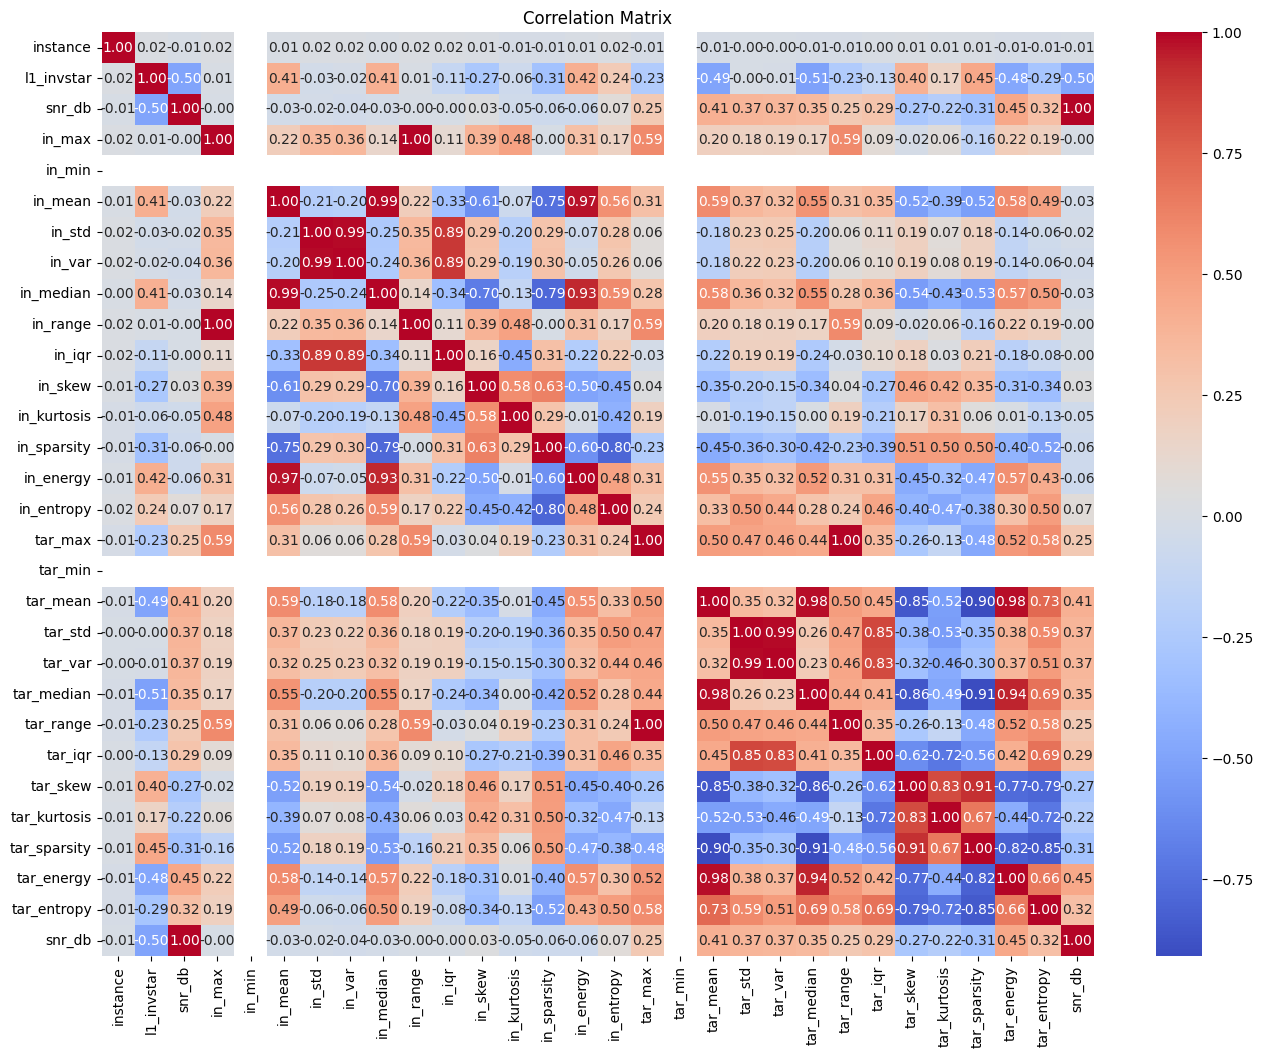

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter only numerical columns
numeric_df = df.select_dtypes(include=["number"])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [98]:
print(df['audio_class'].value_counts())
print(df['noise_class'].value_counts())

from scipy.stats import entropy

entropy_audio = entropy(df["audio_class"].value_counts(normalize=True))
entropy_noise = entropy(df["noise_class"].value_counts(normalize=True))
print(f"Audio class entropy: {entropy_audio:.3f}")
print(f"Noise class entropy: {entropy_noise:.3f}")


audio_class
mixture    844
Unknown    737
bass       725
drums      674
vocals     524
Name: count, dtype: int64
noise_class
0707               945
Unknown            902
crowd              170
Crowd               96
Water               82
                  ... 
crow                13
rain                12
sneezing            11
coughing             9
keyboard_typing      7
Name: count, Length: 61, dtype: int64
Audio class entropy: 1.598
Noise class entropy: 2.872


In [110]:
import pandas as pd

# Deduplicate columns just in case
df = df.loc[:, ~df.columns.duplicated()]
numeric_df = df.select_dtypes(include="number")

# Get correlation with snr_db (as Series!)
snr_corr = numeric_df.corr()["snr_db"].drop("snr_db")

# Sort by absolute correlation
snr_corr_sorted = snr_corr.abs().sort_values(ascending=False)

# Show values with signs preserved
print('Correlation with Signal to Noise ratio')
print(snr_corr[snr_corr_sorted.index])

Correlation with Signal to Noise ratio
l1_invstar     -0.496499
tar_energy      0.449127
tar_mean        0.409202
tar_std         0.373957
tar_var         0.368493
tar_median      0.347888
tar_entropy     0.315343
tar_sparsity   -0.306401
tar_iqr         0.287590
tar_skew       -0.274826
tar_range       0.250160
tar_max         0.250160
tar_kurtosis   -0.215810
in_entropy      0.074240
in_energy      -0.064710
in_sparsity    -0.062426
in_kurtosis    -0.051609
in_var         -0.038400
in_skew         0.032110
in_mean        -0.031811
in_median      -0.027061
in_std         -0.023900
instance       -0.005076
in_iqr         -0.001789
in_range       -0.001478
in_max         -0.001478
in_min               NaN
tar_min              NaN
Name: snr_db, dtype: float64


In [112]:
import pandas as pd

# Deduplicate columns just in case
df = df.loc[:, ~df.columns.duplicated()]
numeric_df = df.select_dtypes(include="number")

# Get correlation with snr_db (as Series!)
snr_corr = numeric_df.corr()["l1_invstar"].drop("l1_invstar")

# Sort by absolute correlation
snr_corr_sorted = snr_corr.abs().sort_values(ascending=False)

# Show values with signs preserved
print('Correlation with l1_invstar ratio')
print(snr_corr[snr_corr_sorted.index])

Correlation with l1_invstar ratio
tar_median     -0.512077
snr_db         -0.496499
tar_mean       -0.493137
tar_energy     -0.477527
tar_sparsity    0.450657
in_energy       0.415935
in_mean         0.414031
in_median       0.406890
tar_skew        0.402602
in_sparsity    -0.306912
tar_entropy    -0.286888
in_skew        -0.266531
in_entropy      0.235031
tar_range      -0.233536
tar_max        -0.233536
tar_kurtosis    0.165602
tar_iqr        -0.127950
in_iqr         -0.114019
in_kurtosis    -0.062505
in_std         -0.034993
instance        0.019579
in_var         -0.017940
tar_var        -0.013197
in_max          0.006199
in_range        0.006199
tar_std        -0.002318
in_min               NaN
tar_min              NaN
Name: l1_invstar, dtype: float64


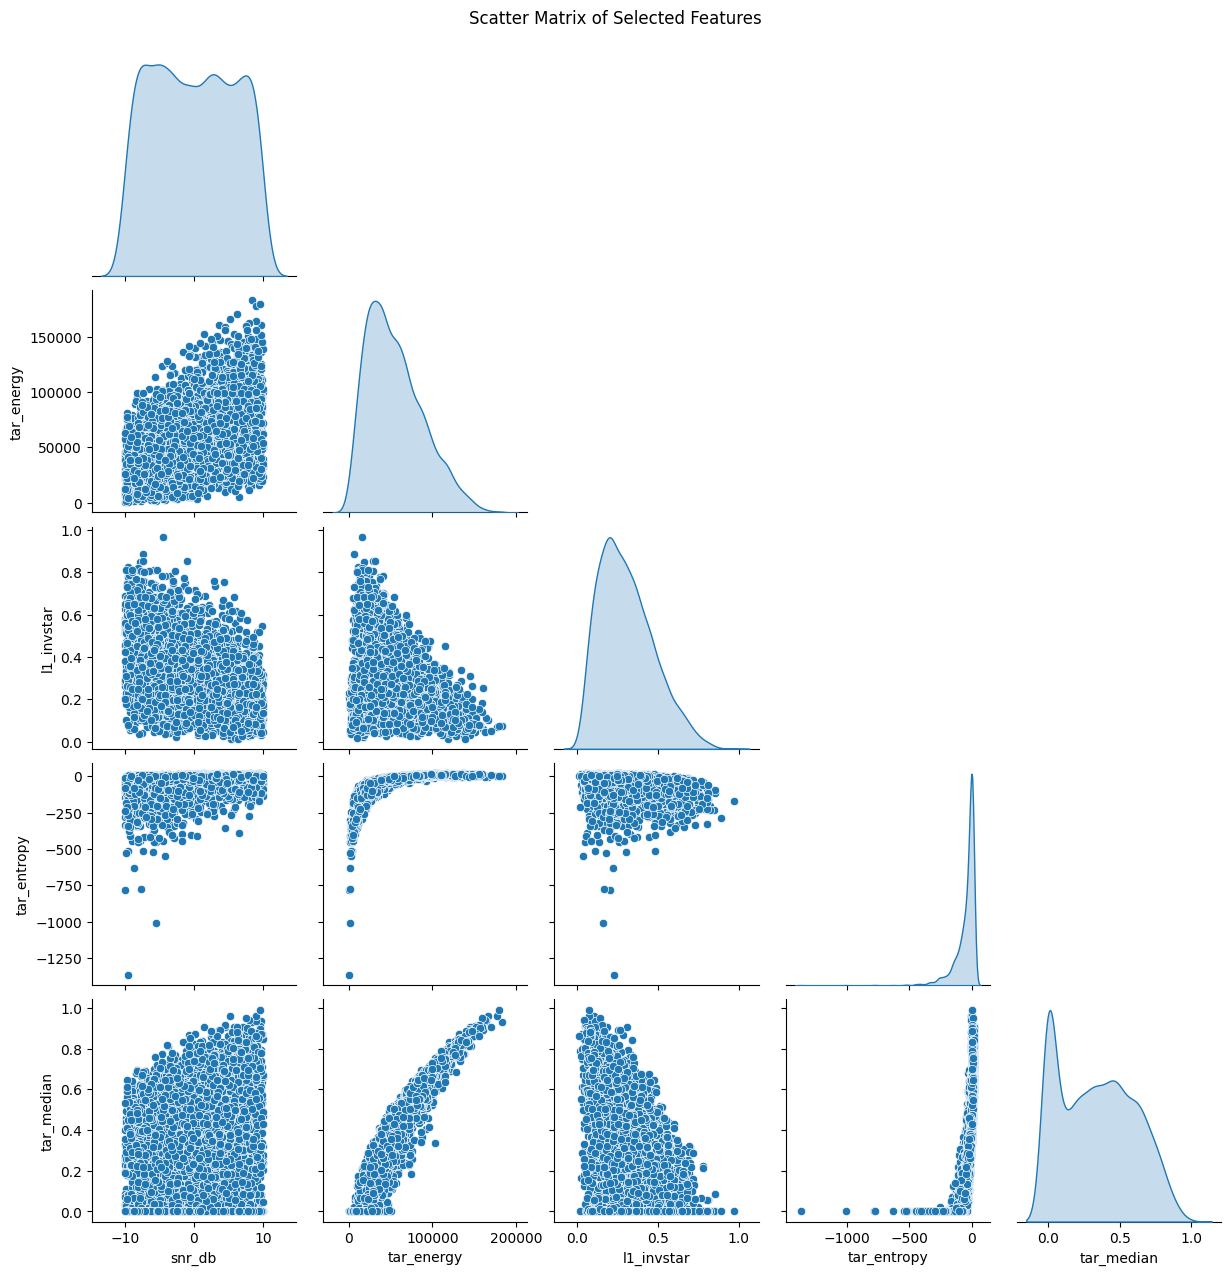

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

# Your list of variables to plot
features = ['snr_db', 'tar_energy', 'l1_invstar', 'tar_entropy', 'tar_median']

# Drop rows with NaNs just for clean plotting
plot_df = df[features].dropna()

# Pairplot!
sns.pairplot(plot_df, diag_kind="kde", corner=True)
plt.suptitle("Scatter Matrix of Selected Features", y=1.02)
plt.show()
